# <a href="https://miptstats.github.io/courses/python.html">Python для анализа данных</a>

Цель данного материала — познакомить вас с Anaconda — инструментом, который поможет вам в программировании на Python и не только. Он пригодится, чтобы не запутаться в версиях установленных библиотек, а также с лёгкостью поможет установить необходимые для курса пакеты.

Это лишь один из общепринятых инструментов для аналитики, другие мы затронем позже или же в других курсах.

## Anaconda

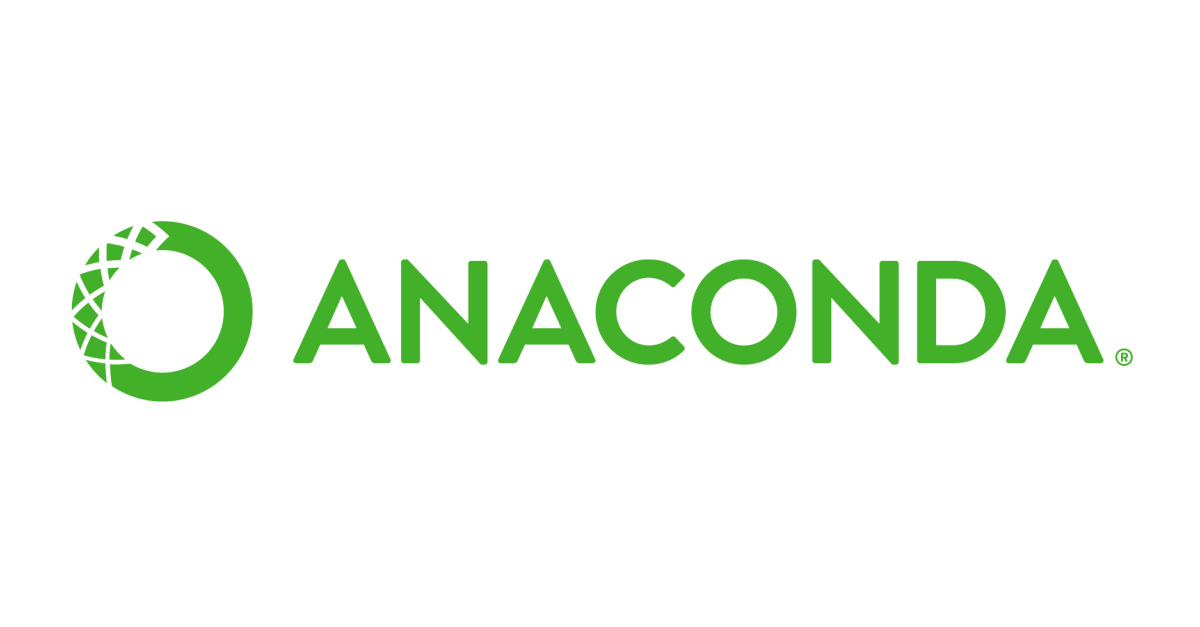    

[`Anaconda`](https://www.anaconda.com)наиболее известна как дистрибутив `Python` со встроенным в него пакетным менеджером `conda`. Она позволяет изолировать окружение проекта от системной версии `Python`, который критически необходим для работы системы. [Использование `sudo pip` считается плохой практикой](https://askubuntu.com/questions/802544/is-sudo-pip-install-still-a-broken-practice). Также `conda` позволяет без проблем переносить окружение с одной машины на другую. Кроме того, если вы что-то сломаете, то с `Anaconda` вы всегда сможете откатиться на более старую версию окружения. Конечно, если вы позаботитесь о регулярных бэкапах. С системной версией `Python` это гораздо сложнее и может потребовать переустановки системы.

Въедливый читатель скажет, что вместо `Anaconda` можно использовать [`virtualenv`](https://virtualenv.pypa.io/en/latest/) или [`docker`](https://www.docker.com). Тем не менее, `docker` это чаще всего `overkill` для простых проектов. Его сложно настраивать, он работает относительно медленно и требует `sudo`-прав. Связка `pip + virtualenv` хорошо работает для `Python`-only проектов, но вам также может быть придётся также работать с `R`. Кроме того, `conda` во многом аналогична пакетному менеджеру внутри операционной системы и позволяет локально без `sudo`-прав, которых в облаке у вас почти никогда нет, установить `gcc`, бразуер, альтернативный `shell` и многое другое для 100+ языков. С более подробным сравнением `Anaconda` с альтернативными инструментами вы можете ознакомиться [по ссылке](https://jakevdp.github.io/blog/2016/08/25/conda-myths-and-misconceptions/).

Мы установим `Anaconda` и настроим с её помощью комфортное окружение для работы над учебными курсами. 


### Альтернативы `Anaconda`

Если вы используете Linux-систему, то чаще проще обойтись без Anaconda, а использовать `pip`, например, 
```bash
pip install numpy
```
В таком случае тоже можно настроить виртуальное окружение. Однако не стоит смешивать использование `pip` и `conda`!

Если вы не хотите ничего себе устанавливать, например, из-за малых мощностей, можно использовать <a href="https://colab.research.google.com/">Google Colab</a>. Но в таком случае каждый раз придется заново настраивать окружение, кроме того, среда выполнения может отключаться при длительном простое.

### Установка `Anaconda`

Скачайте последнюю версию `Anaconda` под свою ОС с [официального сайта](https://www.anaconda.com/distribution/).  Запустите установочный файл и следуйте инструкциям. Не меняйте дефолтные параметры без уважительной причины.
После установки перезагрузите терминал, например, с помощью команды `exec bash`.  Если всё прошло успешно, то ячейка ниже должна отработать без ошибок:

In [ ]:
!conda --version

conda 4.7.11


### Создание `conda environment`

**Заводить отдельный `environment` для каждого проекта — правило хорошего тона.** Устанавливать всё в корневой `envirnonment` — прямой путь в отдельный круг ада, на который вы обрекаете себя в будущем. Кроме того, что это противоречит философии `conda`, — возможности сосуществования несовместимых дистрибутивов `Python` в пределах одной системы, —  это также приводит к неконтролируемому росту числа установленных пакетов. Для разрешения зависимостей `conda` использует [приближённый `SAT-solver`](https://www.anaconda.com/understanding-and-improving-condas-performance/), а задача `SAT` `NP`-полна, потому упорное использование только одного `environment`-а вскоре приведёт к тому, что вы будете часами ждать установки пакетов.  

Выполнив в терминале код из ячейки ниже, вы создадите `environment` для нашего курса в директории `~`:

```bash
conda create -n mipt-stats python=3.7 r=3.6 --yes
```

Эта команда создаст `environment`, в котором уже будут установлены `Python` и `R`, что сэкономит вам время в будущем.  
Активируйте окружение, запустив в терминале ячейку ниже:

```bash
conda activate mipt-stats
```

Если вы захотите вернуться в базовое окружение, введите

```bash
conda deactivate
```

Если вы хотите создать окружение в другой папке, то замените флаг `-n` на `-o`

```bash
conda create -o path/to/env python=3.7 r=3.6 --yes
```

Обратите внимание, что при этом вам придётся указывать полный путь при использовании команды `conda activate`:

```bash
conda activate /path/to/env
```

### Установка `mamba` и основных пакетов 

Выше упоминалось, что для разрешения зависимостей `conda` приближённо решает задачу `SAT`. К сожалению и стыду разработчиков из `Continuum`, `SAT-solver` в `conda` написан на `pure Python`, из-за чего он работает возмутительно медленно. Эту проблему решает [`mamba`](https://medium.com/@wolfv/making-conda-fast-again-4da4debfb3b7) — `SAT-solver` для `conda`, написанный на `C++` компанией [`QuantStack`](https://quantstack.net/the-team.html).

```bash
conda install -c conda-forge mamba --yes
```

Далее везде используйте `mamba install` вместо `conda install`.

Аргумент `-c` позволяет указать репозиторий, в котором будет осуществляться поиск. **Настоятельно рекомендуется использовать репозиторий [`conda-forge`](https://conda-forge.org)**, т.к. там почти всегда можно найти актуальные версии пакетов, чего не скажешь об основном репозитории `Anaconda`. Причина в том, что `conda-forge` управляется сообществом пользователей `conda`, в то время как право добавлять пакеты в основной репозиторий имеют только разработчики из `Continuum`. **Устанавливать пакеты из других репозиториев стоит только при необходимости**, т.к. это может привести к переустановке уже установленных пакетов с их заменой на те версии из репозитория, из которого вы хотите что-то установить.

Теперь установим те пакеты, которые вам почти наверное понадобятся при выполнении домашних заданий. 

In [ ]:
!mamba install -c conda-forge pip git numpy \
scipy statsmodels sympy pandas tqdm --yes

**<span style="color:red">Важное замечание:</span> никогда не смешивайте `pip` и `conda`!**  

Подробное обсуждение этого вопроса можно прочитать [на stackoverflow](https://stackoverflow.com/questions/56134588/is-that-a-bad-idea-to-use-conda-and-pip-install-on-the-same-environment). Кратко, `conda` и `pip` были созданы для принципиально разных задач и "не знают" друг о друге: пакеты, которые вы установили через `pip`, будут видны изнутри `conda`, так как они ставятся напрямую в системный `Python`, но никакой инкапсуляции при этом не получится. Они не будут учитываться `conda` при разрешении зависимостей, а также могут быть параллельно установлены через `conda` в другой версии, что приведёт к странным ошибкам и неизбежному моральному падению. 

Более того, даже если вы установите `pip` через `conda`, это всё ещё будет не то же самое, что установка пакетов через `conda` обычным образом. Гарантировать корректное разрешение зависимостей при этом будет нельзя. 